In [7]:
# import daal4py.sklearn
# daal4py.sklearn.patch_sklearn()

import wget



from sklearnex import patch_sklearn 

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn import neighbors
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


import numpy as np
import pandas as pd

import seaborn as sns

from math import floor, sqrt
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [ ]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

file_name = wget.download(file_url)

In [26]:
def nearestRectangle(x_vars) -> tuple[int, int]:
        num_vars = len(x_vars)
        
        l = w = floor(sqrt(num_vars))
        
        if l * w < num_vars:
            w += 1
            if l * w < num_vars:
                l += 1
           
        return l, w


def get_vars():
    with open('winequality-red.csv','r') as f_read:
        var_names = f_read.readline()[:-1].split(';')
        var_names = [var.strip('"') for var in var_names]
        var_names.pop()  # remove quality var
        f_read.close()
        
        return var_names

def getSeed():
    try:
        seed = int(input("Input an integer value"))
        return seed
    except:
        return getSeed()     
        

In [27]:
data_set = 'R'

#import data
if data_set[0] == 'R':
    df = pd.read_csv('winequality-red.csv', delimiter=';')
else:
    df = pd.read_csv('winequality-white.csv', delimiter=';')

axis_names = {}
with open('axis_names.txt', 'r', encoding='utf-8') as f:    
    lines = f.readlines()
    for line in lines:
        var, axis = line.split(':')
        axis_names[var] = axis.format('\u00b3').rstrip('\n')  # format ^3

In [28]:
x_vars = get_vars()
y_var = 'quality'
palette = ['#DAF7A6','#FFC300','#FF5733','#C70039','#900C3F','#581845','#2b031f']
dims = nearestRectangle(x_vars)  # dims for subplot

df_x = df[x_vars]
df_target = df[y_var]

print(x_vars)
print(y_var)


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


In [29]:
sum_stats = df.describe().T
sum_stats['median'] = [df[f'{col}'].median() for col in df]
sum_stats['variance'] = [df[f'{col}'].var() for col in df]
sum_stats.columns.to_list()

['count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'median',
 'variance']

In [30]:
cols = ['mean','median','variance', 'std',
        'min', '25%', '50%', '75%', 'max'
        ]
sum_stats = sum_stats[cols].convert_dtypes(True)
sum_stats

,mean,median,variance,std,min,25%,50%,75%,max
fixed acidity,8.319637,7.9,3.031416,1.741096,4.6,7.1,7.9,9.2,15.9
volatile acidity,0.527821,0.52,0.032062,0.17906,0.12,0.39,0.52,0.64,1.58
citric acid,0.270976,0.26,0.037947,0.194801,0.0,0.09,0.26,0.42,1.0
residual sugar,2.538806,2.2,1.987897,1.409928,0.9,1.9,2.2,2.6,15.5
chlorides,0.087467,0.079,0.002215,0.047065,0.012,0.07,0.079,0.09,0.611
free sulfur dioxide,15.874922,14.0,109.414884,10.460157,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,46.467792,38.0,1082.102373,32.895324,6.0,22.0,38.0,62.0,289.0
density,0.996747,0.99675,0.000004,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,3.311113,3.31,0.023835,0.154386,2.74,3.21,3.31,3.4,4.01
sulphates,0.658149,0.62,0.028733,0.169507,0.33,0.55,0.62,0.73,2.0


In [31]:
sum_stats.to_clipboard()

In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
def sum_stats(arr:pd.Series) -> list:
    outlist = [arr.mean(),arr.median(),arr.var(),arr.std(),arr.max(),arr.min()]
    print(f"{axis_names[arr.name]}:\n"
          f"        Mean:  {outlist[0]:.2f}\n"
          f"      Median:  {outlist[1]:.2f}\n"
          f"    Variance:  {outlist[2]:.2f}\n"
          f"     Std dev:  {outlist[3]:.2f}\n"
          f"     Maximum:  {outlist[4]:.2f}\n"
          f"     Minimum:  {outlist[5]:.2f}\n"
          )
    return outlist

#print summary stats for all columns
for name in df.keys():
    sum_stats(df[name])   

Tartaric Acid g/dm³:
        Mean:  8.32
      Median:  7.90
    Variance:  3.03
     Std dev:  1.74
     Maximum:  15.90
     Minimum:  4.60

Acetic Acid g/dm³:
        Mean:  0.53
      Median:  0.52
    Variance:  0.03
     Std dev:  0.18
     Maximum:  1.58
     Minimum:  0.12

Citric Acid g/dm³:
        Mean:  0.27
      Median:  0.26
    Variance:  0.04
     Std dev:  0.19
     Maximum:  1.00
     Minimum:  0.00

Residual Sugar g/dm³:
        Mean:  2.54
      Median:  2.20
    Variance:  1.99
     Std dev:  1.41
     Maximum:  15.50
     Minimum:  0.90

Sodium Chloride g/dm³:
        Mean:  0.09
      Median:  0.08
    Variance:  0.00
     Std dev:  0.05
     Maximum:  0.61
     Minimum:  0.01

Free Sulfur Dioxide mg/dm³:
        Mean:  15.87
      Median:  14.00
    Variance:  109.41
     Std dev:  10.46
     Maximum:  72.00
     Minimum:  1.00

Total Sulfur Dioxide mg/dm³:
        Mean:  46.47
      Median:  38.00
    Variance:  1082.10
     Std dev:  32.90
     Maximum:  289.

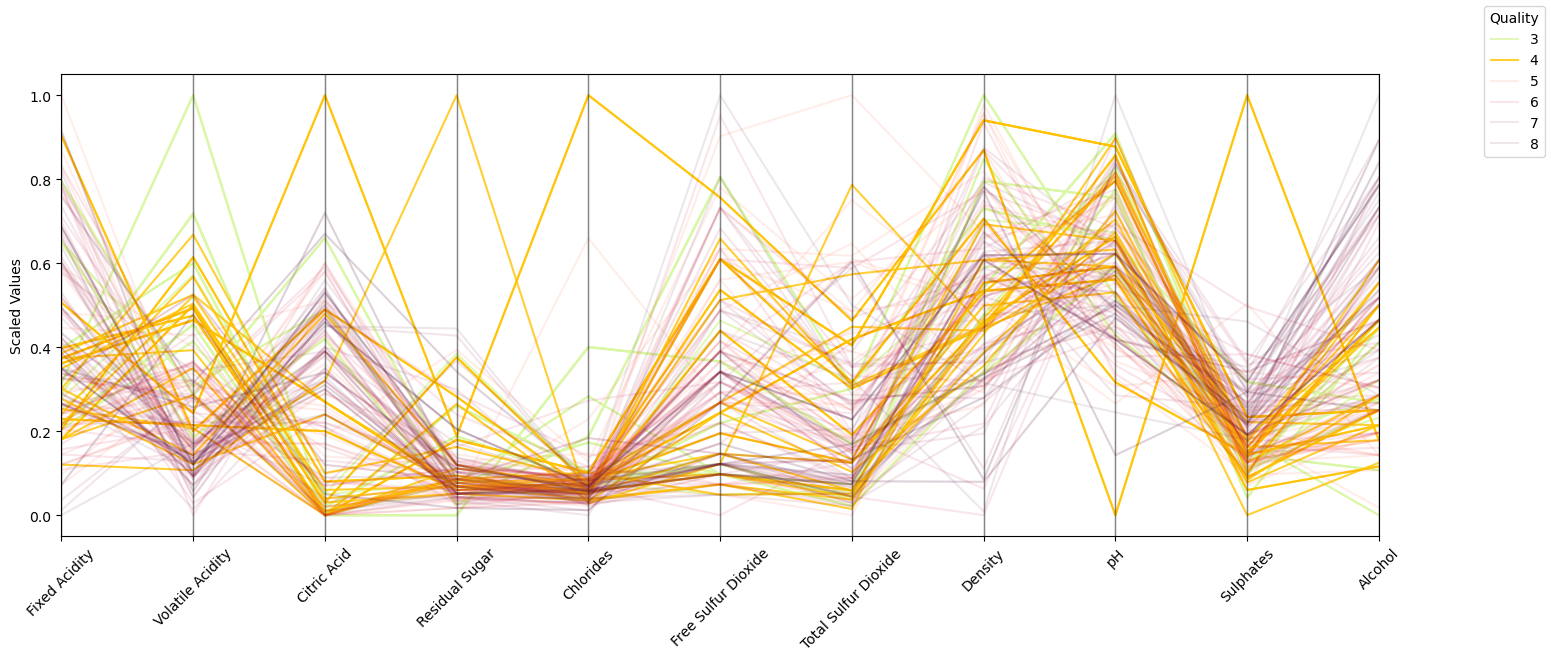

In [34]:
def graphParallel(vars:list, dfx:pd.DataFrame):
    var_names = vars

    dfx[var_names] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dfx[var_names])

    
    # quality = [3          4           5       6           7       8           9   ]
    
    
    # takes sample of each quality level with replacement
    dfx_c = dfx.groupby('quality').sample(n = 30, replace=True)
    
    dfx_c.unstack()
    
    # scale every entry
    dfx_c[var_names] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dfx_c[var_names])

    # create figure
    f, ax = plt.subplots()
    f.set_size_inches(17,6)
    
    # include quality and sort by it 
    var_names.append('quality')
    dfx_c = dfx_c.sort_values('quality')
    qual_v_c = set(dfx_c['quality'])
    
    # plot parallel plot for each quality level
    for ind, qual in enumerate(qual_v_c):
        plot = pd.plotting.parallel_coordinates(dfx_c.loc[dfx_c['quality']==qual,var_names],'quality',
                                            color=palette[ind], ax=ax,
                                            alpha = 0.8, 
                                            )

    dict_c_q = {}
    for qual, color in zip(qual_v_c,palette):
        dict_c_q[qual] = color
        
    
    highlights = input("Input list of ints delimited by commas "
                       "of qualities you want to highlight in range {}.".format((min(qual_v_c),max(qual_v_c))))    
    highlights = highlights.split(',')
    highlights = [dict_c_q[int(num)] for num in highlights]
    
    plines = plot.get_lines()

    # only highlight a specific quality or qualities
    for line in plines:

        if line.get_color() not in highlights:
            line.set_alpha(0.1)
        


    ax = plot.axes
    ax.set_ylabel('Scaled Values')
    var_names.pop()
    for ind, name in enumerate(var_names):
        if name != 'pH':
            var_names[ind] = name.title()


    ax.set_xticklabels(var_names, rotation = 45)
    
    f.legend(title='Quality')
    plot.legend().remove()
    # print(type(plot))
    
    return plot

paras = graphParallel(x_vars.copy(), df.copy())

C:\Users\Morri\AppData\Local\Temp\ipykernel_25044\2962209582.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax_pca = df_scaled.plot(kind = 'hist', ax = ax_hist_scaled,


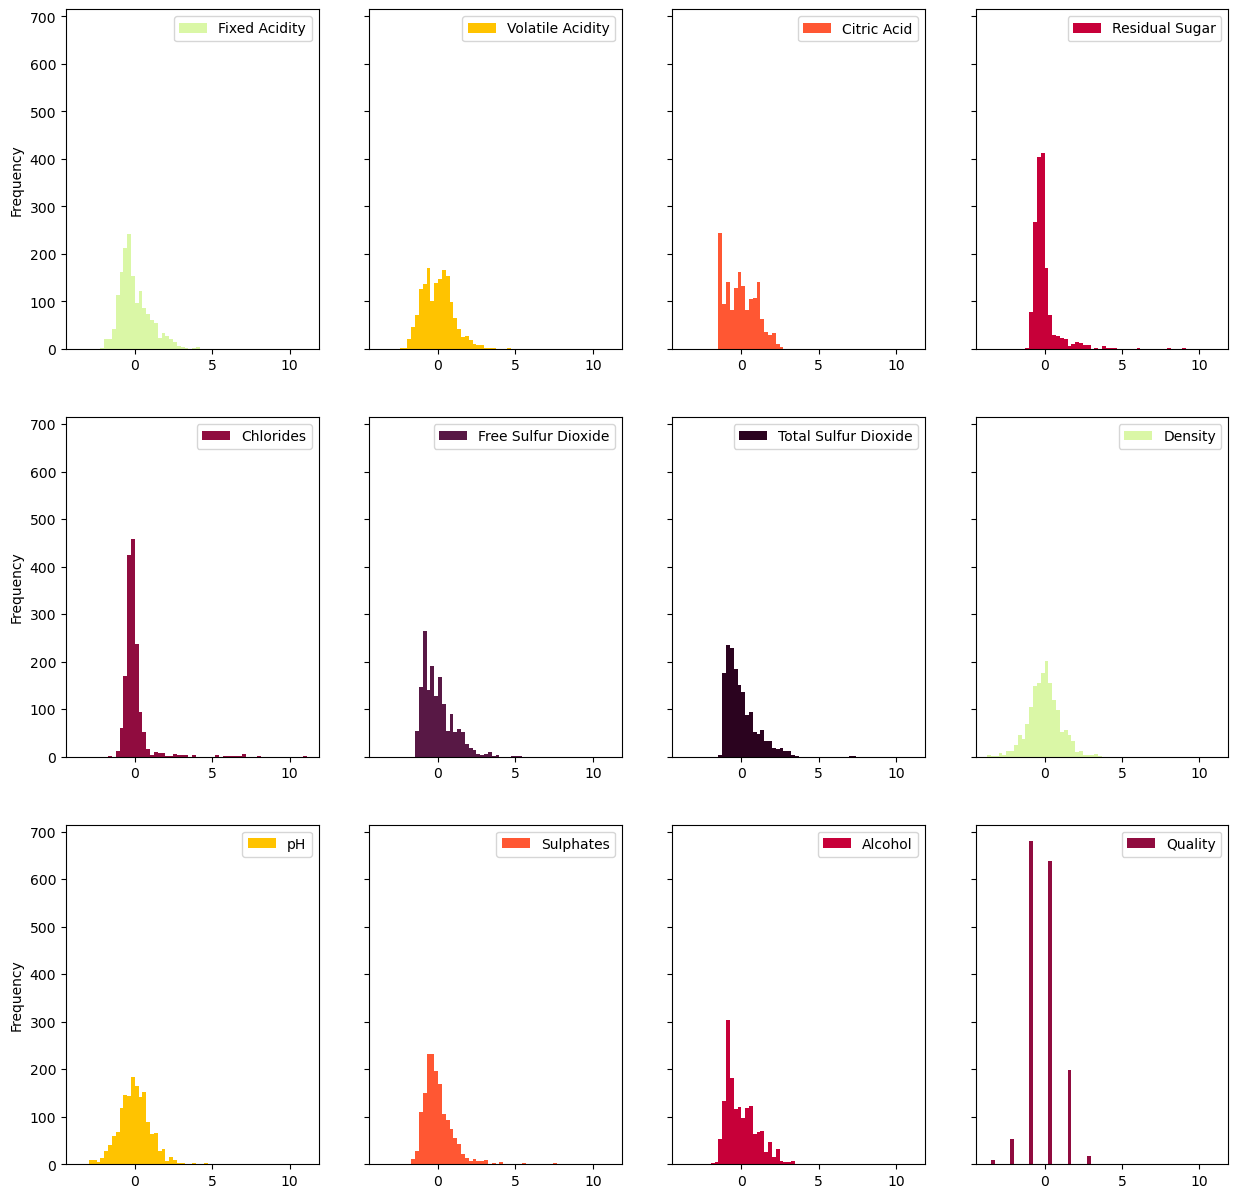

In [35]:
f_hist_scaled, ax_hist_scaled = plt.subplots()
f_hist_scaled.set_size_inches(15,15)

red_standardized = df.copy()

for name in x_vars:
    red_standardized[name] = (red_standardized[name]-red_standardized[name].mean()) / red_standardized[name].std()

var_names = []
for ind, name in enumerate(x_vars):
    if name != 'pH':
        var_names.append(name.title())
    else:
        var_names.append(name)
        
name_dict = {old:new for old, new in zip(x_vars, var_names)}        
name_dict['quality'] = 'Quality'
red_standardized.rename(columns = name_dict, inplace = True)

df_scale_ind = name_dict.values()


dims = (3, 4)
df_scaled = pd.DataFrame(scale(df.values),columns = df_scale_ind)

ax_pca = df_scaled.plot(kind = 'hist', ax = ax_hist_scaled, 
                     subplots = True,
                     sharey = True, bins = 60,
                     layout = (dims[0], dims[1]),
                     color = palette
                     )


Text(0.5, 0, 'Quality')

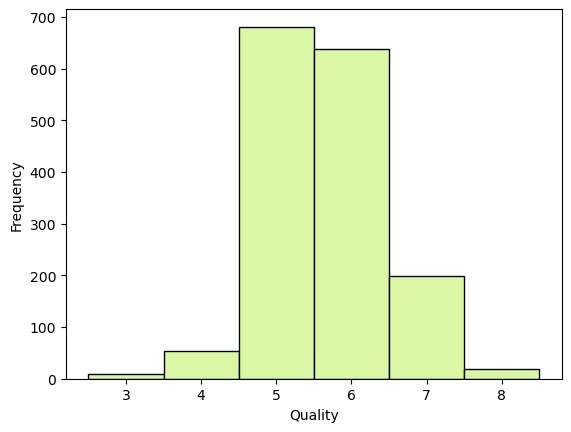

In [36]:
red_standardized['Quality'].plot(kind = 'hist',
                    bins = [2.5,3.5,4.5,5.5,6.5,7.5,8.5],
                    color = palette,
                    edgecolor = 'black'
                    ).set_xlabel('Quality')

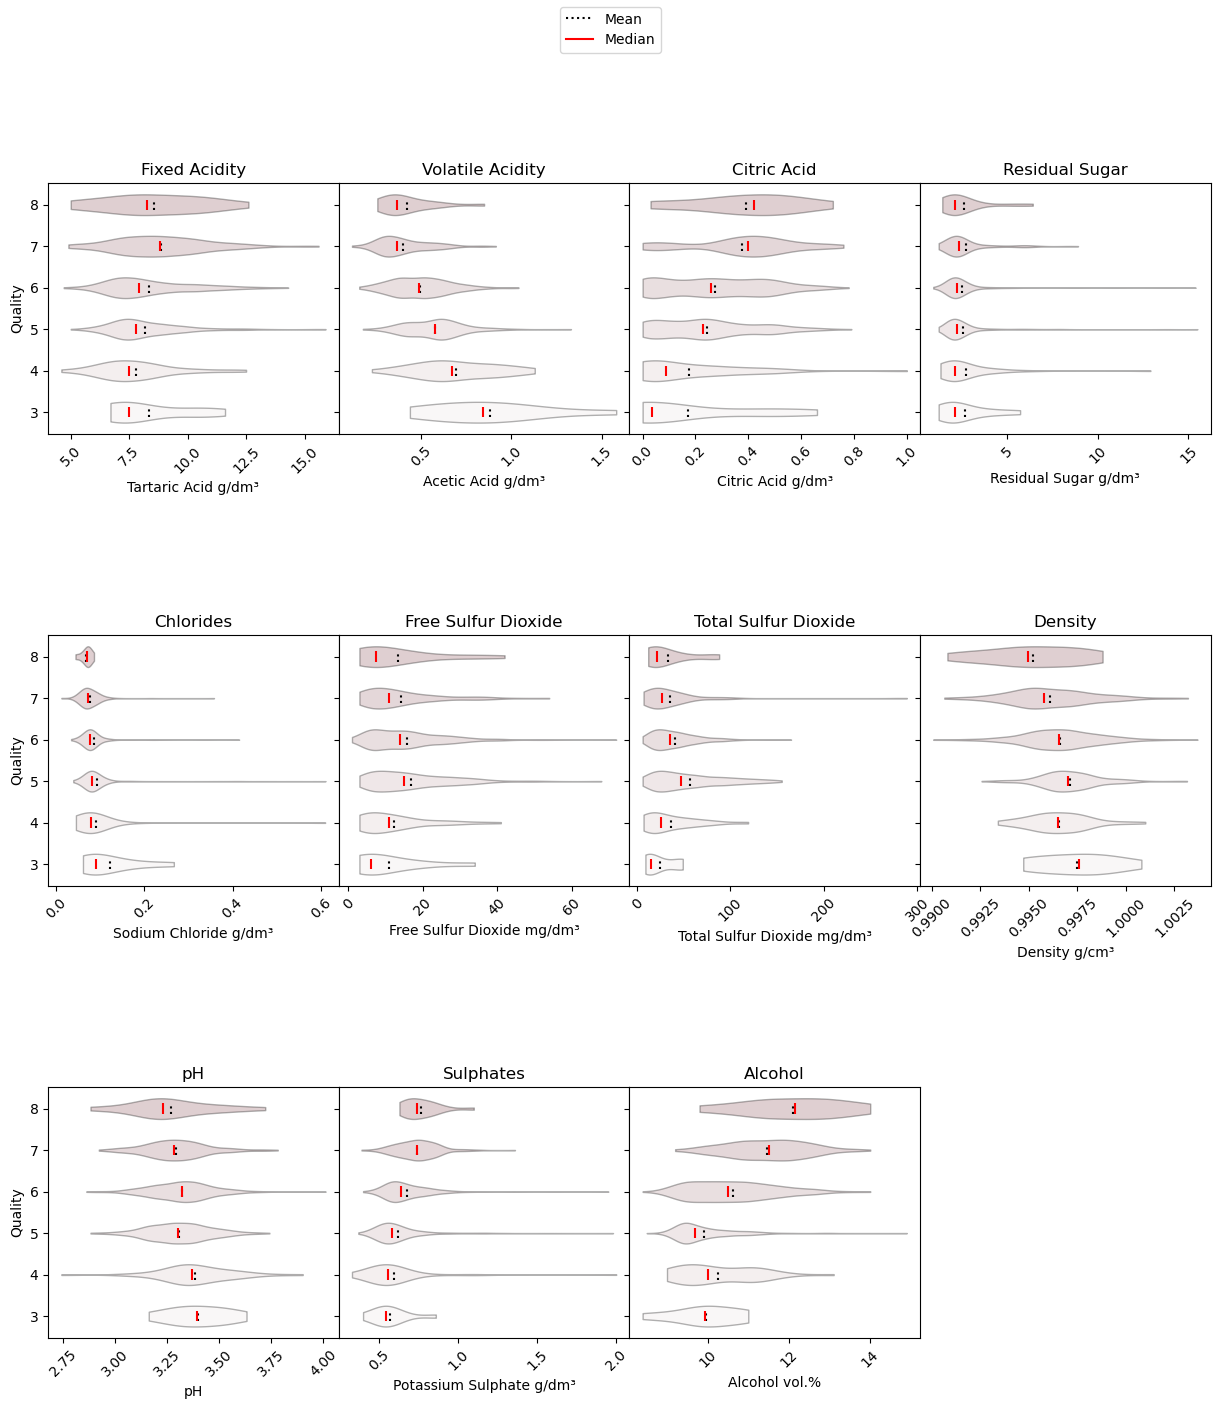

In [37]:
red_groups_index = (list(set(df_target)))

# create groups from red wine vars by quality
red_grouped = df.groupby('quality')

# create a list of lists of arrays by quality for a variable
red_by_qualities = [[sorted(np.array(red_grouped.get_group(i)[j]))  
                    for i in red_groups_index
                    ]
                    for j in x_vars
                    ]

# color palette
r_palette = ['#722f37','#844950','#956369',
            '#a77d82','#b9979b','#cab1b4',
            '#dccbcd','#ede5e6'
            ]

r_palette.reverse()

#plot all red wine vars with shared axes 
f, ax_r = plt.subplots(dims[0], dims[1], sharey='row',
                    gridspec_kw={'hspace': 0.8,
                                'wspace': 0
                                }                    
                    )
f.set_size_inches(15,15)

for ind, ax in np.ndenumerate(ax_r):
    if len(ind) > 1:
        n = ind[1] + ind[0] * dims[1]
        if ind[1] == 0:
            ax.set_ylabel('Quality')
    elif len(ind) == 1:
        n = ind[0]
        if ind[0] == 0:
            ax.set_ylabel('Quality')
    else:
        n = 0
        ax.set_ylabel('Quality')
    
    if n < len(x_vars):
        
        ax_parts = ax.violinplot(red_by_qualities[n], red_groups_index,
                                points = 300, vert = False,
                                showextrema = False, showmeans = True,
                                showmedians = True
                                )
        # set x variable name
        cur_var = x_vars[n]
        ax.set_xlabel(axis_names[cur_var])
        # rotate x ticks 45 deg
        ax.tick_params(axis='x', labelrotation=45)
        # set title
        if cur_var != 'pH':
            ax.set_title(cur_var.title())
        else:
            ax.set_title(cur_var)

        
        #change colors of each violin bodies
        for ind, pc in enumerate(ax_parts['bodies']):
            pc.set_facecolor(r_palette[ind])
            pc.set_edgecolor('black')
            
        #change colors and shapes of mean ticks
        
        ax_parts['cmeans'].set_colors('black')
        ax_parts['cmeans'].set_linestyle(':')
        ax_parts['cmedians'].set_colors('r')
        
    # delete axes if no additional data exists
    else:
        f.delaxes(ax)

legend_elements = [plt.Line2D([0],[0], color = 'black', linestyle=':', label = 'Mean'),
                   plt.Line2D([0],[0], color = 'r', label = 'Median')
                   
                   ]

f.legend(handles = legend_elements, loc = 'upper center')

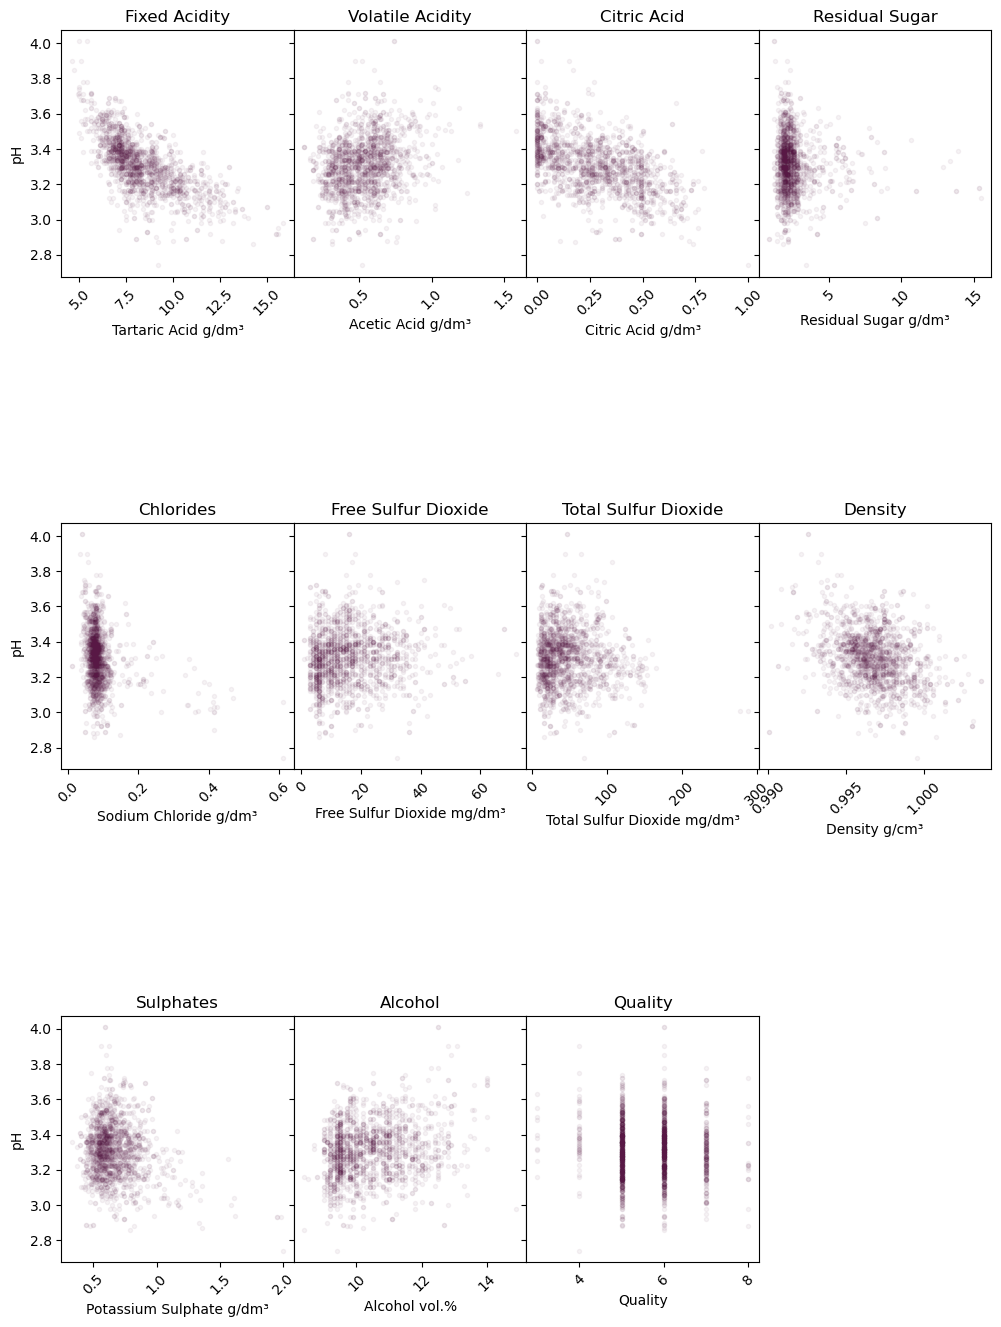

In [38]:
def plotScatter(x_vars:list[str], df_x:pd.DataFrame, df_target:pd.Series, dims:tuple[int,int], axis_names:dict):
    fig_r, ax_r = plt.subplots(dims[0], dims[1], sharey = 'row',
                                gridspec_kw = {'hspace': 1,
                                                'wspace': 0}
                                )
    fig_r.set_size_inches(dims[0]*4,dims[1]*4)
    # loop over all axes in np array
    for ind, ax in np.ndenumerate(ax_r):
        # set overall index and label y if needed
        if len(ind) > 1:
            n = ind[1] + ind[0] * dims[1]
            if ind[1] == 0:
                ax.set_ylabel(axis_names[df_target.name])
        elif len(ind) == 1:
            n = ind[0]
            if ind[0] == 0:
                ax.set_ylabel(axis_names[df_target.name])
        else:
            n = 0
            if df_target.name in axis_names:
                ax.set_ylabel(axis_names[df_target.name])
            else:
                # for linear regression vis
                ax.set_ylabel(df_target.name)
        
        # plot the data
        if n < len(x_vars):
            cur_var = x_vars[n]
            ax.scatter(df_x[cur_var], df_target,
                    alpha = 0.05, marker = '.', c = '#581845'
                    )
                    
            
            
            
            # check if a var in data
            if cur_var in axis_names.keys():
                # rotate
                ax.tick_params(axis='x', labelrotation=45)
                # set title and x label
                ax.set_xlabel(axis_names[cur_var])
                if cur_var != 'pH':
                    ax.set_title(cur_var.title())
                else:
                    ax.set_title(cur_var)
            else:
                
                # plot line f(x) = x 
                goal = np.linspace(min(df_x[cur_var].min(),
                                        df_target.min()
                                        ), max(df_x[cur_var].max(),
                                                df_target.max()
                                                )
                                    )
                ax.plot(goal,goal, c = 'black', alpha = 0.5)
                
                # set title and x label
                title = df_target.name
                if title != 'pH':
                    title = title.title()
                
                ax.set_title(f'Predicted vs Actual Values of \n{title} Test Set')
                ax.set_xlabel(cur_var)
        else: 
            # delete extra axes
            fig_r.delaxes(ax)

scat_vars = ['fixed acidity', 'volatile acidity',
             'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density',
              'sulphates', 'alcohol', 'quality']
plotScatter(scat_vars, df[scat_vars], df['pH'], dims, axis_names)

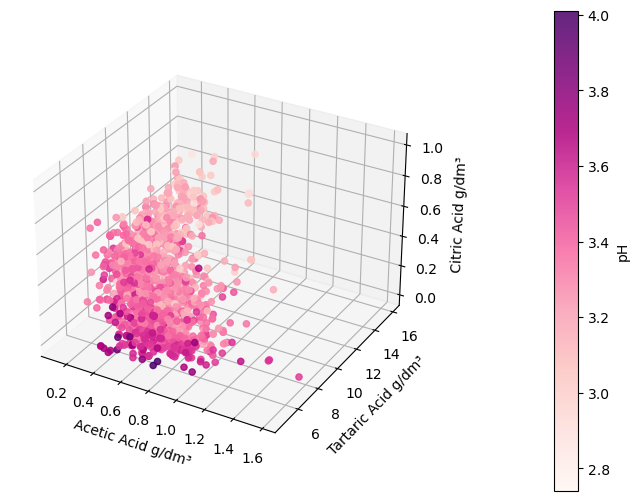

In [39]:
f = plt.figure()
ax_r = f.add_axes([5, 1, 1, 1], projection = '3d')
c_map = None
color_var = None


var_names_2 = ['volatile acidity', 'citric acid','pH']
df_y = df['fixed acidity'].copy()
colorby = len(var_names_2) == 3
alpha = 0.1

# set color map, colorby, and alpha vars
if colorby:
    c_map = 'RdPu'
    color_var = df[var_names_2[-1]]      
    alpha = 0.85

# plot 3d scatter
plot = ax_r.scatter(df[var_names_2[0]], 
                    df_y,
                    df[var_names_2[1]],
                    cmap = c_map, c = color_var,
                    alpha=alpha
                    )
# set axes labels
ax_r.set_xlabel(axis_names[var_names_2[0]])
ax_r.set_ylabel(axis_names[df_y.name])
ax_r.set_zlabel(axis_names[var_names_2[1]])

# create color bar if needed
if colorby:
    c_bar = f.colorbar(plot, ax=ax_r, pad = 0.2)
    c_bar.set_label(axis_names[var_names_2[-1]])
            

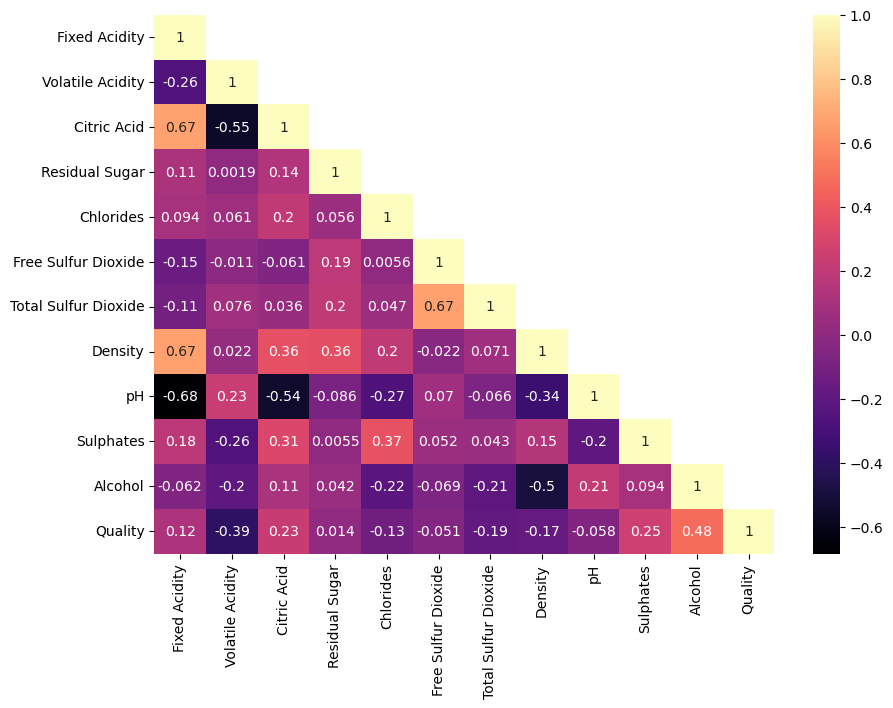

In [40]:

vars = []
cor = df.corr()
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(cor, dtype=bool), 1)

plot = sns.heatmap(cor, cmap="magma",mask = mask, annot=True)
for name in df.keys():
        if name != 'pH':
            vars.append(name.title())
        else:
            vars.append(name)


plot.set_xticklabels(vars)
plot.set_yticklabels(vars)
plt.show()

In [41]:
col_corr = set()  
threshold = 0.5
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            colname = cor.columns[i]                  
            col_corr.add(colname)

print(col_corr)

{'total sulfur dioxide', 'pH', 'density', 'citric acid'}


In [138]:

def graphGridsearch(results):
     # Create df of results from grid search
     results_df = pd.DataFrame(results)

     # Create multiindex of parameters
     df_params =  results_df.params.apply(pd.Series)
     index = pd.MultiIndex.from_frame(df_params.iloc[:, :2])
     
     # Set multiindex as index on results and unstack
     results_df = results_df.set_index(index)
     results_df = results_df['mean_test_score'].unstack(level=0)
     
     
     if results_df.isnull().sum().sum() == 0:   
          # Create meshgrid of parameters
          X, Y = np.meshgrid(np.sort(df_params.iloc[:, 0].unique()), np.log(np.sort(df_params.iloc[:, 1].unique())))

          # Create a 3D plot of the mean test scores from each models
          fig = plt.figure()
          ax = plt.axes(projection="3d")
          ax.plot_surface(X, Y, results_df.values, cmap = 'jet')
          ax.view_init(elev=30., azim=35)

          # Set axis labels
          ax.set_xlabel("C")
          ax.set_ylabel("log(gamma)")
          ax.set_zlabel("Mean Test Score")
          plt.show()

     # Create heatmap of results
     sns.heatmap(results_df, cmap = 'jet')
     

In [43]:
def graphConfusion(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=red_groups_index,
                yticklabels=red_groups_index)
    
    plt.xlabel('True Quality')
    plt.ylabel('Predicted Quality')
    plt.show()

In [44]:
seed = getSeed()

# copy significant x vars from df and split

# df_x_c = df_x[["volatile acidity", "chlorides", "pH", "sulphates", "alcohol"]].copy()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_target, random_state = seed)

red_x_train = x_train[["volatile acidity", "chlorides", "total sulfur dioxide","pH", "sulphates", "alcohol"]].copy()
red_x_test = x_test[["volatile acidity", "chlorides", "total sulfur dioxide","pH", "sulphates", "alcohol"]].copy()
red_y_train = y_train.copy()
red_y_test = y_test.copy()
# red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(df_x_c, df_target, random_state=seed)


In [45]:
def graphResid(y_pred, y_test, title:str):
    # count the occurrences of each point
    c = Counter(zip(y_pred,y_test))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [10*c[(xx,yy)] for xx,yy in zip(y_pred,y_test)]

    # plot actual v predicted
    f = plt.figure()
    ax = plt.axes()

    plt.scatter(y_pred, y_test, s=s, c = "#581845", alpha = 0.5)

    # set x and y ticks as integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel("Actual")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel("Predicted")


    goal = np.linspace(min(y_pred.min(),
                            df_target.min()
                            ), max(y_pred.max(),
                                    df_target.max()
                                    )
                                    )
    ax.plot(goal,goal, c = 'black', alpha = 0.5)
    ax.set_title(title)
    #calculate and print acc score
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy: ", acc)

    if type(y_pred) != np.ndarray:
        residuals = y_test.array - y_pred.array
    else:
        residuals = y_test.array - y_pred
    het_test = sms.het_breuschpagan(residuals, x_test)
    for i in zip( ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value'],het_test):
        print(i)
        
    print("If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.")


    plt.show()
    
    return acc

In [46]:


red_only_sig = df_x[["volatile acidity", "chlorides", "total sulfur dioxide","residual sugar", "pH", "sulphates", "alcohol"]]

red_x3 = sm.add_constant(red_only_sig)
est3 = sm.OLS(df_target, red_x3)

est4 = est3.fit()
print(est4.summary())

print(est4.resid.shape, est4.model.exog.shape)
# test for heterosked
sked_test = sms.het_breuschpagan(est4.resid, est4.model.exog)
for i in zip( ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value'],sked_test):
    print(i)
    
print("If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.")
# test for autocorr in residuals
res_autocorr = durbin_watson(est4.resid)
print("If {} is between 1.5 and 2.5 there is no autocorrelation in the residuals.".format(res_autocorr))




                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     126.4
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          6.46e-148
Time:                        11:30:25   Log-Likelihood:                -1573.0
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1591   BIC:                             3205.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2644 

Accuracy:  0.6025
('Lagrange multiplier statistic', 135.4263181044129)
('p-value', 3.6396490212225704e-24)
('f-value', 18.10144921897646)
('f p-value', 3.9490818445351067e-29)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


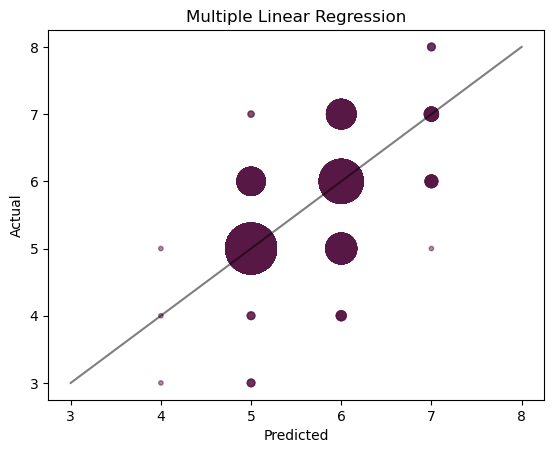

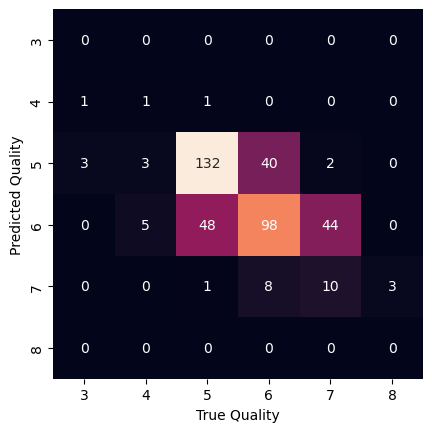

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.11      0.17         9
           5       0.73      0.73      0.73       182
           6       0.50      0.67      0.57       146
           7       0.45      0.18      0.26        56
           8       0.00      0.00      0.00         3

    accuracy                           0.60       400
   macro avg       0.34      0.28      0.29       400
weighted avg       0.59      0.60      0.58       400



In [93]:
#MLR
# create linear regression model on copy of data frame
red_reg = LinearRegression(n_jobs=-1)
red_reg.fit(red_x_train,red_y_train)

# predict test set
red_pred = red_reg.predict(red_x_test)

# round outputs to the nearest whole number
if df_target.name == 'quality':
    red_pred = list(map(lambda x: round(x), red_pred))

# calculate mse and r2
red_mse = mean_squared_error(red_y_test, red_pred)
red_r2 = r2_score(red_y_test, red_pred)


red_pred = pd.DataFrame.from_dict({'Predicted':red_pred}, orient= 'columns')['Predicted']
red_y_test = pd.DataFrame.from_dict({'Actual':red_y_test}, orient= 'columns' )['Actual']

# plot predicted v actual
lr_f1 = f1_score(red_y_test, red_pred, average='weighted')
lr_acc = graphResid(red_pred,red_y_test,  "Multiple Linear Regression")
lr_mf1 = f1_score(red_y_test, red_pred, average='macro')
graphConfusion(red_y_test,red_pred)
print(classification_report(y_test, red_pred, zero_division=0))

In [48]:

# create ordinal linear regression model
mod_prob = OrderedModel(red_y_train,
                        red_x_train,
                        distr = 'probit',)

res_prob = mod_prob.fit(method='bfgs',maxiter = 500)
res_prob.summary()


Optimization terminated successfully.
         Current function value: 0.973475
         Iterations: 59
         Function evaluations: 62
         Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -1167.2
Model:                   OrderedModel   AIC:                             2356.
Method:            Maximum Likelihood   BIC:                             2412.
Date:                Thu, 08 Dec 2022                                         
Time:                        11:30:26                                         
No. Observations:                1199                                         
Df Residuals:                    1188                                         
Df Model:                          11                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.8610      0.210     -8.862      0.000      -2.273      -1.449
chlorides               -2.9333      0.752     -3.901      0.000      -4.407      -1.459
total sulfur dioxide    -0.0035      0.001     -3.484      0.000      -0.006      -0.002
pH                      -0.7265      0.232     -3.127      0.002      -1.182      -0.271
sulphates                1.3630      0.210      6.487      0.000       0.951       1.775
alcohol                  0.5106      0.036     14.002      0.000       0.439       0.582
3/4                     -0.6734      0.818     -0.823      0.410      -2.276       0.929
4/5                     -0.0630      0.160     -0.394      0.693      -0.376       0.250
5/6                      0.6736      0.040     16.898      0.000       0.595       0.752
6/7                      0.5112      0.040     12.803      0.000       0.433       0.589
7/8                      0.3869      0.082      4.745      0.000       0.227       0.547
========================================================================================
"""

Accuracy:  0.5
('Lagrange multiplier statistic', 151.8858700293677)
('p-value', 1.525154328278999e-27)
('f-value', 21.64824984828093)
('f p-value', 2.4648096545472355e-34)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


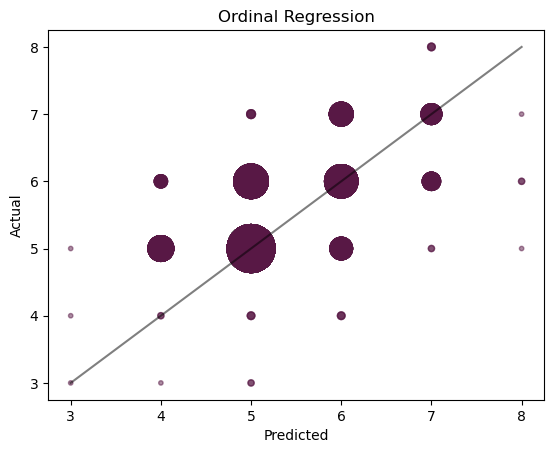

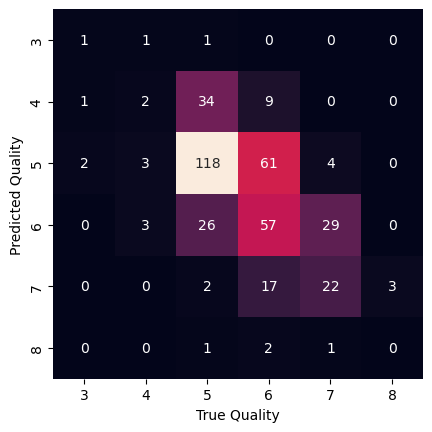

              precision    recall  f1-score   support

           3       0.33      0.25      0.29         4
           4       0.04      0.22      0.07         9
           5       0.63      0.65      0.64       182
           6       0.50      0.39      0.44       146
           7       0.50      0.39      0.44        56
           8       0.00      0.00      0.00         3

    accuracy                           0.50       400
   macro avg       0.33      0.32      0.31       400
weighted avg       0.54      0.50      0.52       400



In [95]:

# predict as a single number
y_pred = res_prob.predict(red_x_test, offset= 3, which = 'linpred')

# round prediciton to nearest whole number
y_pred = list(map(lambda x: round(x), y_pred))

y_pred = pd.DataFrame.from_dict({'Predicted':y_pred}, orient= 'columns')["Predicted"]


o_f1 = f1_score(y_test, y_pred, average='weighted')
o_mf1 = f1_score(y_test, y_pred, average='macro')
o_acc = graphResid(y_pred, y_test, "Ordinal Regression")



graphConfusion(y_test,y_pred)
print(classification_report(y_test, y_pred, zero_division=0))


In [50]:
n=11
# do PCA dim reduction to 5
pca = PCA(n_components=n, )
pca_evr = pca.fit(scale(df_x))

pca_evr = (pca.explained_variance_ratio_)



pca_evr = np.concatenate((np.zeros(1), pca_evr))
pca_evr

array([0.        , 0.28173931, 0.1750827 , 0.1409585 , 0.11029387,
       0.08720837, 0.05996439, 0.05307193, 0.03845061, 0.0313311 ,
       0.01648483, 0.00541439])

[0.         0.28173931 0.45682201 0.59778051 0.70807438 0.79528275
 0.85524714 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


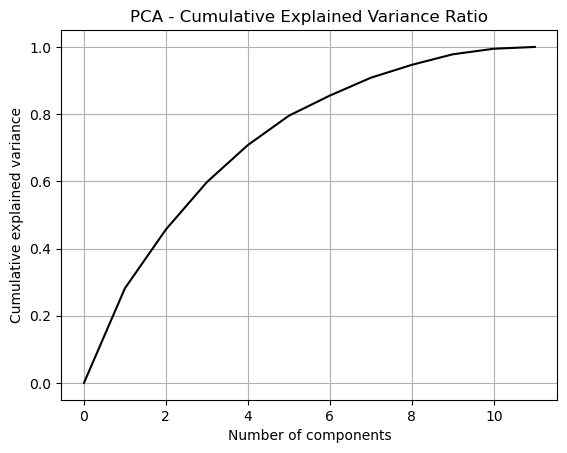

In [51]:
plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Cumulative Explained Variance Ratio")
plt.grid()
print(np.cumsum(pca_evr))

explained variance ratio
first 11 components: 
                 0.2817
                 0.1751
                 0.1410
                 0.1103
                 0.0872
                 0.0600
                 0.0531
                 0.0385
                 0.0313
                 0.0165
                 0.0054


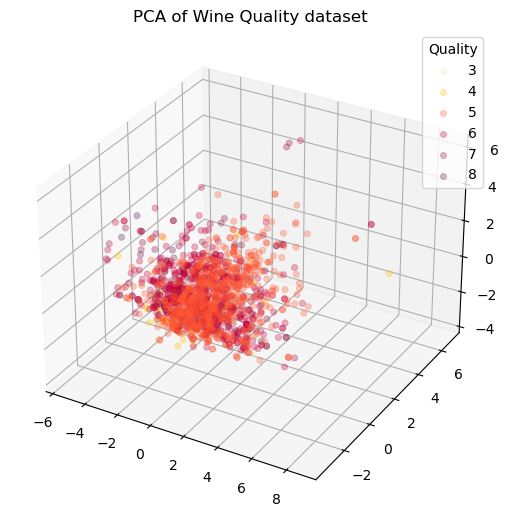

In [52]:

# pca plot
print('explained variance ratio')

pca_r = pca.fit_transform(scale(df_x))

# Percentage of variance explained for each component
print(f'first {n} components: ')
for i in pca.explained_variance_ratio_:
    print(f'                 {i:.4f}')
    

palette = ['#DAF7A6','#FFC300','#FF5733','#C70039','#900C3F','#581845']
palette_r = palette

lw = 0.5

fig_pca = plt.figure()
ax_p = fig_pca.add_axes([5, 1, 1, 1], projection = '3d')
# ax_p = Axes3D(fig_pca)


quals = []


for color, i in zip(palette_r, red_groups_index):

    qual = ax_p.scatter(pca_r[df_target == i, 0],
                        pca_r[df_target == i, 1],
                        pca_r[df_target == i, 2],
                        color=color, alpha=0.3, 
                        lw=lw, label=i
                        )
    quals.append(qual)
    

leg = ax_p.legend(loc="best", shadow=False, scatterpoints=1, title = 'Quality')
plt.title("PCA of Wine Quality dataset")
plt.show()

# lined = {}  # Will map legend lines to original lines.
# for legline, origline in zip(leg.get_lines(), quals):
#     legline.set_picker(True)  # Enable picking on the legend line.
#     lined[legline] = origline


# def on_pick(event):
#     # On the pick event, find the original line corresponding to the legend
#     # proxy line, and toggle its visibility.
#     legline = event.artist
#     print(event.artist)
#     origline = lined[legline]
#     visible = not origline.get_visible()
#     origline.set_visible(visible)
#     # Change the alpha on the line in the legend so we can see what lines
#     # have been toggled.
#     legline.set_alpha(1.0 if visible else 0.2)
#     fig_pca.canvas.draw()

# fig_pca.canvas.mpl_connect('pick_event', on_pick)    



C:\Users\Morri\AppData\Local\Temp\ipykernel_25044\4118750062.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax_pca = pca_df.plot(kind = 'hist', ax = ax_hist,


,0,1,2,3,4,5,6,7,8,9,10
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,-0.929714,1.009829,-0.762587,0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,-0.401473,0.539553,-0.597946,0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,0.131017,-0.344290,0.455375,-0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,-0.054835,-0.170812,0.355866,0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,0.674711,0.607970,0.247640,1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,0.506410,0.231082,-0.079382,0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,0.860408,0.321487,0.468876,0.612248,0.779404,0.040923


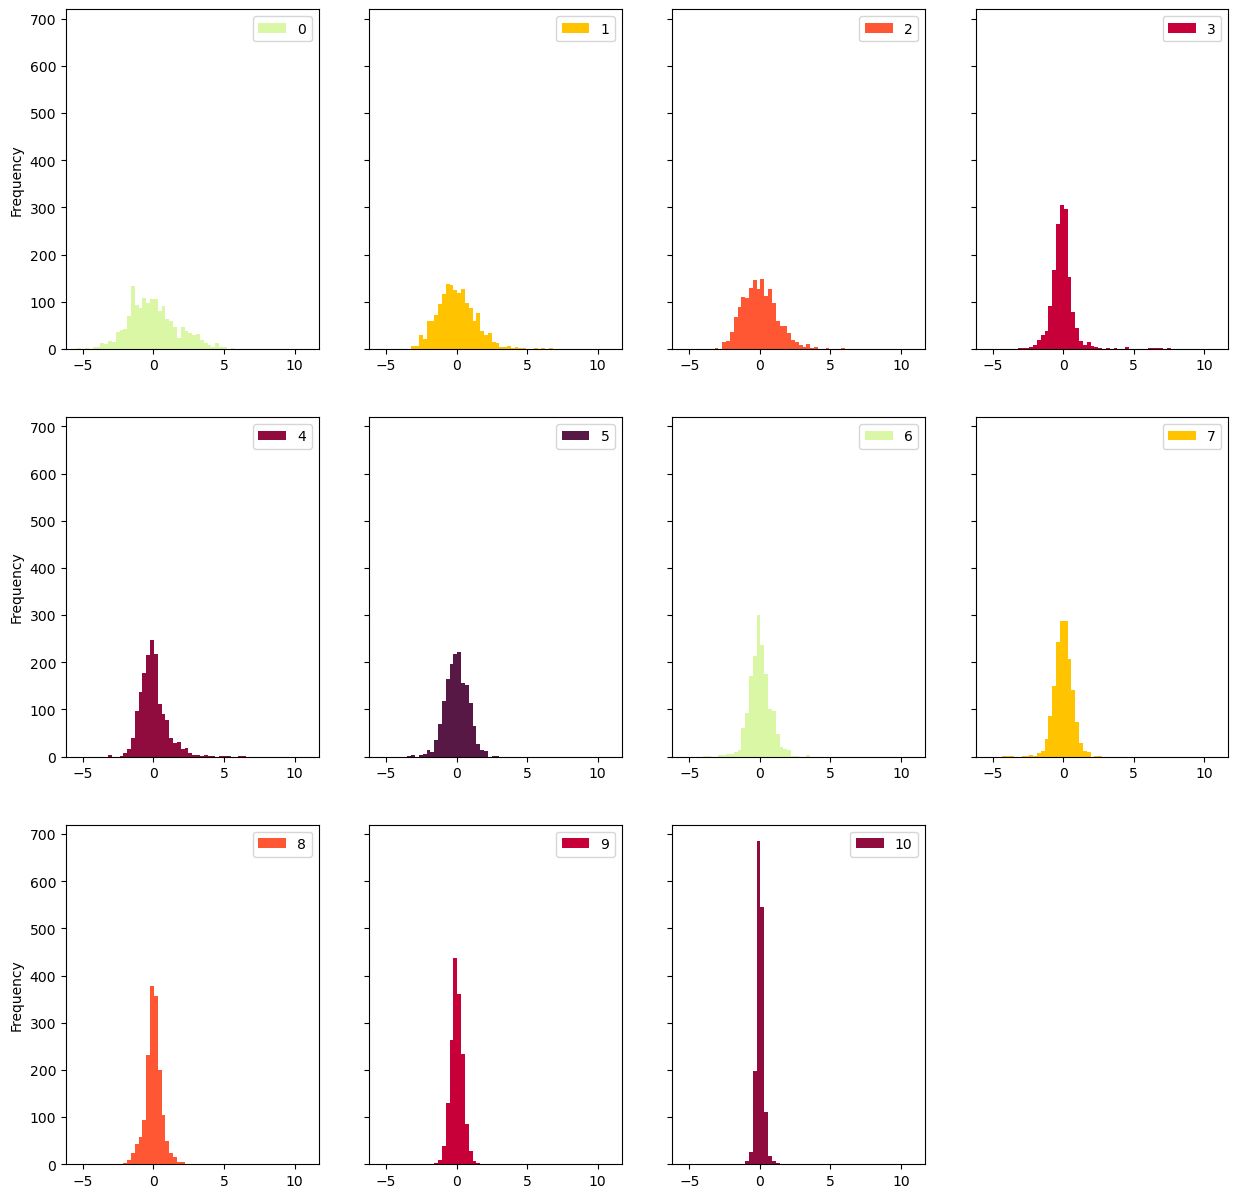

In [53]:
pca_dict = {ind:pca for ind, pca in enumerate(pca_r)}
pca_df = pd.DataFrame.from_dict(pca_dict).T

fig_pca_hist, ax_hist = plt.subplots()
fig_pca_hist.set_size_inches(15,15)

dims = (3, 4)
ax_pca = pca_df.plot(kind = 'hist', ax = ax_hist, 
                     subplots = True,
                     sharey = True, bins = 60,
                     layout = (dims[0], dims[1]),
                     color = palette
                     )

pca_df

In [54]:
red_reg = LinearRegression(n_jobs=-1)
lr_model = make_pipeline(pca, red_reg)
lr_model.fit(x_train, y_train)


y_pred = lr_model.predict(x_test)
y_pred = list(map(lambda x: round(x), y_pred))

y_pred = pd.DataFrame.from_dict({'Predicted':y_pred}, orient= 'columns')["Predicted"]

Weighted F1 Score: 0.5743698614047452
Accuracy: 0.5725
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.08      0.11      0.10         9
           5       0.68      0.68      0.68       182
           6       0.52      0.55      0.53       146
           7       0.58      0.45      0.51        56
           8       0.00      0.00      0.00         3

    accuracy                           0.57       400
   macro avg       0.31      0.30      0.30       400
weighted avg       0.58      0.57      0.57       400

Accuracy:  0.5725
('Lagrange multiplier statistic', 101.43981079800977)
('p-value', 2.8057130730162375e-17)
('f-value', 12.015267646517746)
('f p-value', 1.7797069005159842e-19)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


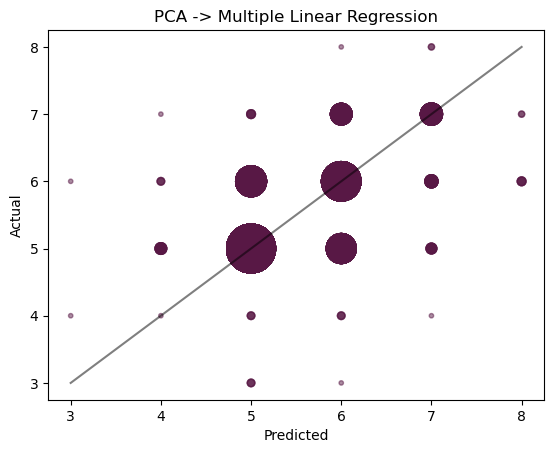

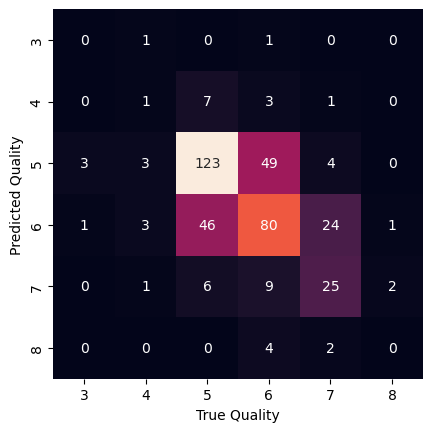

In [101]:
lr_class_report = classification_report(y_test, y_pred, output_dict = True, zero_division=0)
print(f'Weighted F1 Score: {lr_class_report["weighted avg"]["f1-score"]}\n'
      f'Accuracy: {lr_class_report["accuracy"]}')
print(classification_report(y_test, y_pred, zero_division=0))

pca_lr_f1 = f1_score(y_test, y_pred, average='weighted')
pca_lr_acc = graphResid(y_pred,y_test,"PCA -> Multiple Linear Regression")
pca_lr_mf1 = f1_score(y_test, y_pred, average='macro')
graphConfusion(y_test,y_pred)

In [81]:
# PCA SVC
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

gamma = list(range(-24,0))
gamma = [2**i for i in gamma]
c_list = [100, 1000, 2000, 3000, 4000, 5000, 6000, 10000]

# gamma = gamma.extend('auto','scale')
parameters = {'svc__C': c_list,
            'svc__gamma': gamma,
            'svc__kernel':['rbf']
            }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

clf_pca = GridSearchCV(model, parameters, cv=cv, n_jobs = -1)

clf_pca.fit(x_train, y_train)

print(clf_pca.best_params_)

{'svc__C': 1000, 'svc__gamma': 0.0009765625, 'svc__kernel': 'rbf'}


Weighted F1 Score: 0.6153427762925442
Accuracy: 0.63
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.72      0.78      0.75       182
           6       0.55      0.62      0.58       146
           7       0.56      0.36      0.43        56
           8       0.00      0.00      0.00         3

    accuracy                           0.63       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.61      0.63      0.62       400

Accuracy:  0.63
('Lagrange multiplier statistic', 83.3130076065566)
('p-value', 1.1220586453223683e-13)
('f-value', 9.303353077725388)
('f p-value', 7.135604739663086e-15)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


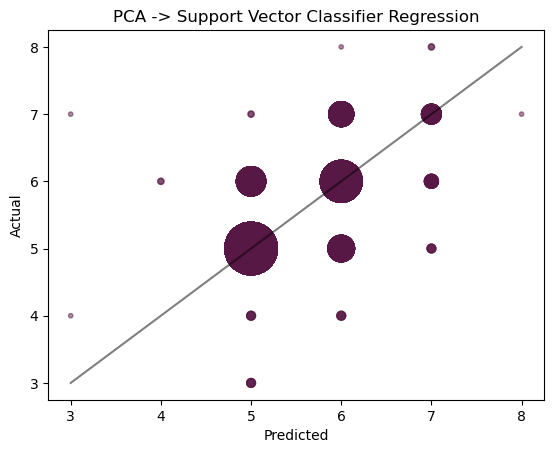

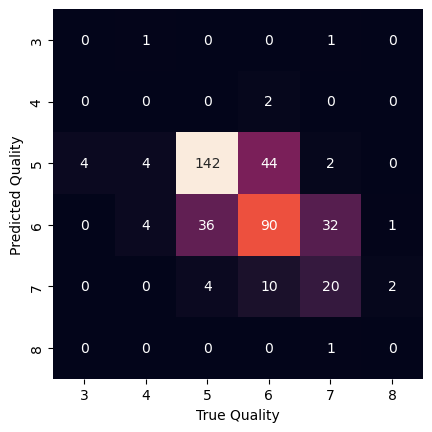

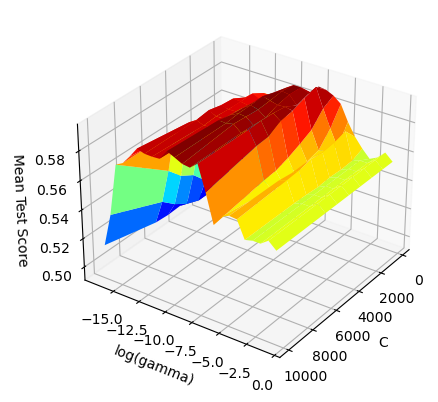

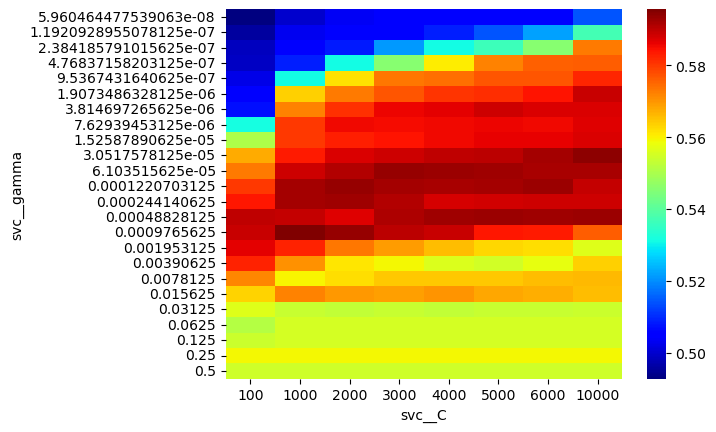

In [97]:
#PCA SVM

y_pred = clf_pca.predict(x_test)
# round prediciton to nearest whole number
y_pred = list(map(lambda x: round(x), y_pred))

y_pred = pd.DataFrame.from_dict({'Predicted':y_pred}, orient= 'columns')["Predicted"]



pca_svc_class_report = classification_report(y_test, y_pred, output_dict = True, zero_division=0)
print(f'Weighted F1 Score: {pca_svc_class_report["weighted avg"]["f1-score"]}\n'
      f'Accuracy: {pca_svc_class_report["accuracy"]}')
print(classification_report(y_test, y_pred, zero_division=0))


pca_svm_f1 = f1_score(y_test, y_pred, average='weighted')
pca_svm_mf1 = f1_score(y_test, y_pred, average='macro')
pca_svm_acc= graphResid(y_pred,y_test,"PCA -> Support Vector Classifier Regression")
graphConfusion(y_test,y_pred)
graphGridsearch(clf_pca.cv_results_)

In [ ]:
#PCA Polynomial SVC

parameters = {'svc__C': [500],
            'svc__gamma': [0.5],
            'svc__kernel':['poly']
            }

clf_2 = GridSearchCV(model, parameters, cv=3, n_jobs = -1)
clf_2.fit(x_train, y_train)
print(clf_2.best_params_)

In [98]:
y_pred = clf_2.predict(x_test)

y_pred = list(map(lambda x: round(x), y_pred))

y_pred = pd.DataFrame.from_dict({'Predicted':y_pred}, orient= 'columns')["Predicted"]



pca_svc_class_report = classification_report(y_test, y_pred, output_dict = True, zero_division=0)
print(f'Weighted F1 Score: {pca_svc_class_report["weighted avg"]["f1-score"]}\n'
      f'Accuracy: {pca_svc_class_report["accuracy"]}')
print(classification_report(y_test, y_pred, zero_division=0))


pca_svmp_f1 = f1_score(y_test, y_pred, average='weighted')
pca_svmp_mf1 = f1_score(y_test, y_pred, average='macro')
pca_svmp_acc = graphResid(y_pred,y_test,"PCA -> Support Vector Classifier Regression\n Polynomial 3 kernel")
graphConfusion(y_test,y_pred)


NameError: name 'clf_2' is not defined

{'gamma': 0.25, 'C': 1000}


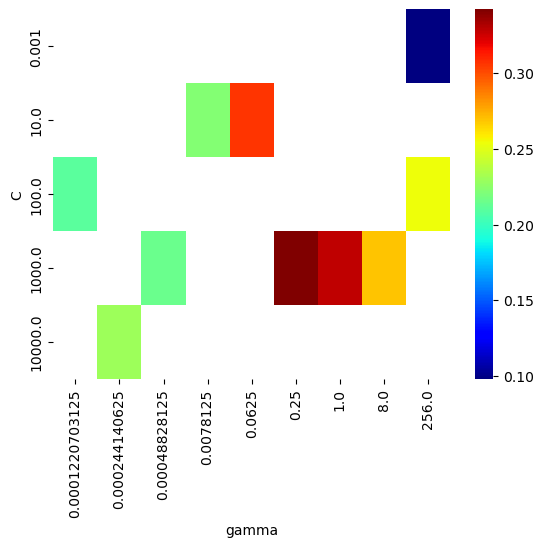

In [142]:
from sklearn.model_selection import RandomizedSearchCV

gamma = list(range(-15,10))
gamma = [2**i for i in gamma]

random_grid = {
    "C": [0.001,0.01,0.1,1,10,100,1000,10000,20000],
    'gamma':gamma,
    # 'kernel':['rbf']
               
}
svc_random = RandomizedSearchCV(svc,random_grid,cv=cv,scoring = 'f1_macro')
svc_random.fit(scale(x_train), y_train)
print(svc_random.best_params_)
graphGridsearch(svc_random.cv_results_)

In [123]:
gamma = list(range(-10,4))
gamma = [2**i for i in gamma]
c_list = [0.5,1,4,20,100, 1000, 5000,10000]

parameters_1 = {'C': c_list,
            'gamma': gamma,
            'kernel':['rbf']
            }


In [130]:
# SVC cv = 5
clf_4 = GridSearchCV(svc, parameters_1, cv=cv, scoring = 'f1_macro', n_jobs = -1)

clf_4.fit(scale(x_train), y_train)
print(clf_4.best_params_)

{'C': 1000, 'gamma': 0.125, 'kernel': 'rbf'}


Weighted F1 Score: 0.5743698614047452
Accuracy: 0.5725
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.08      0.11      0.10         9
           5       0.68      0.68      0.68       182
           6       0.52      0.55      0.53       146
           7       0.58      0.45      0.51        56
           8       0.00      0.00      0.00         3

    accuracy                           0.57       400
   macro avg       0.31      0.30      0.30       400
weighted avg       0.58      0.57      0.57       400

Accuracy:  0.5725
('Lagrange multiplier statistic', 101.43981079800977)
('p-value', 2.8057130730162375e-17)
('f-value', 12.015267646517746)
('f p-value', 1.7797069005159842e-19)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


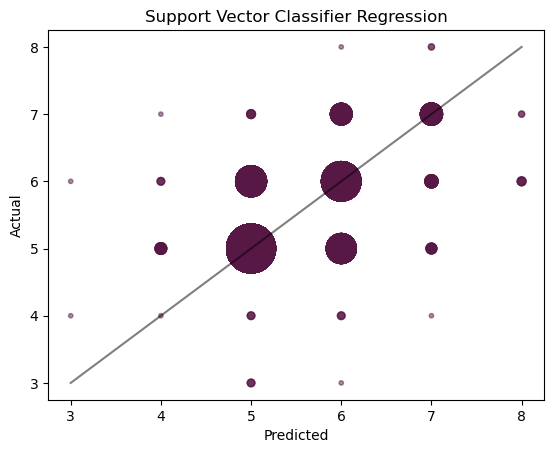

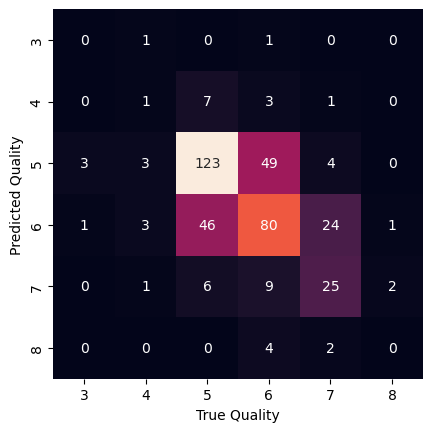

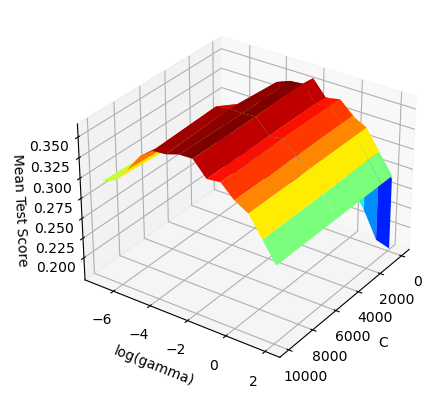

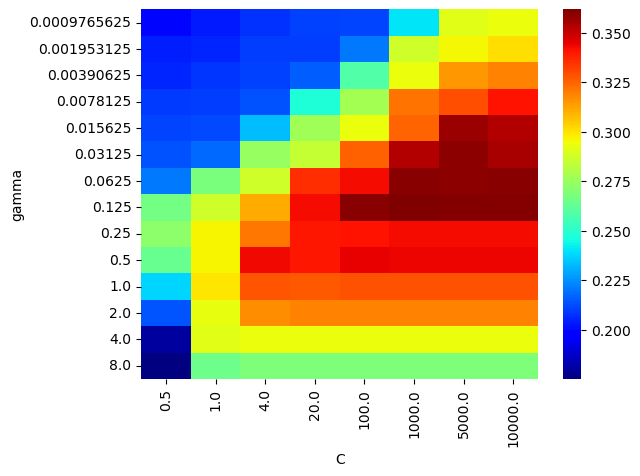

In [131]:
y_pred = clf_4.predict(scale(x_test))
# round prediciton to nearest whole number
y_pred = list(map(lambda x: round(x), y_pred))

y_pred = pd.DataFrame.from_dict({'Predicted':y_pred}, orient= 'columns')["Predicted"]

svc_class_report = classification_report(y_test, y_pred, output_dict = True, zero_division=0)
print(f'Weighted F1 Score: {svc_class_report["weighted avg"]["f1-score"]}\n'
      f'Accuracy: {svc_class_report["accuracy"]}')

print(classification_report(y_test, y_pred, zero_division=0))

svm_f1 = f1_score(y_test, y_pred, average='weighted')
svm_mf1 = f1_score(y_test, y_pred, average='macro')
svm_acc = graphResid(y_pred,y_test, "Support Vector Classifier Regression")
graphConfusion(y_test,y_pred)
graphGridsearch(clf_4.cv_results_)

In [333]:
#random forest
 



NameError: name 'Pipeline' is not defined

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.65      0.70      0.67       182
           6       0.49      0.60      0.54       146
           7       0.48      0.21      0.30        56
           8       0.00      0.00      0.00         3

    accuracy                           0.57       400
   macro avg       0.27      0.25      0.25       400
weighted avg       0.54      0.57      0.55       400

Accuracy:  0.5675
('Lagrange multiplier statistic', 96.80862375639934)
('p-value', 2.36710927124826e-16)
('f-value', 11.291564456090473)
('f p-value', 2.8920335583002205e-18)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


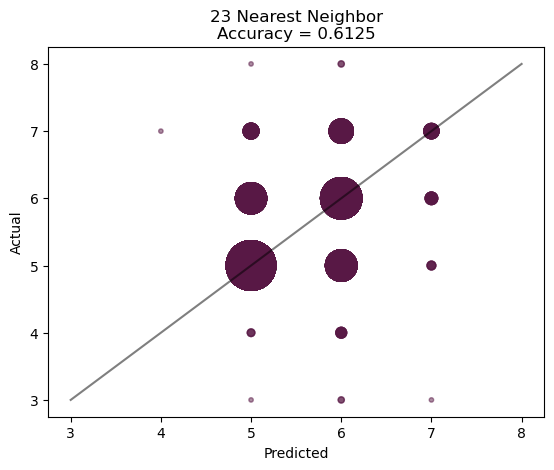

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.65      0.70      0.67       182
           6       0.49      0.60      0.54       146
           7       0.48      0.21      0.30        56
           8       0.00      0.00      0.00         3

    accuracy                           0.57       400
   macro avg       0.27      0.25      0.25       400
weighted avg       0.54      0.57      0.55       400

Accuracy:  0.5675
('Lagrange multiplier statistic', 96.80862375639934)
('p-value', 2.36710927124826e-16)
('f-value', 11.291564456090473)
('f p-value', 2.8920335583002205e-18)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


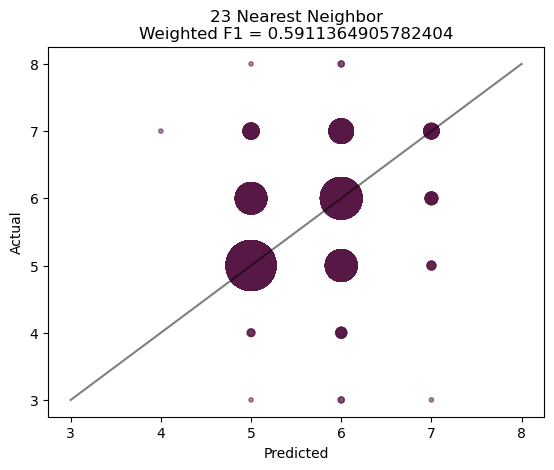

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.69      0.66      0.67       182
           6       0.51      0.56      0.53       146
           7       0.42      0.38      0.40        56
           8       0.00      0.00      0.00         3

    accuracy                           0.56       400
   macro avg       0.27      0.27      0.27       400
weighted avg       0.56      0.56      0.56       400

Accuracy:  0.5575
('Lagrange multiplier statistic', 87.6669784496396)
('p-value', 1.5519948275561284e-14)
('f-value', 9.926017849803054)
('f p-value', 6.040811982195701e-16)
If p-values is less than 0.05 reject null hypothesis that the residual is homoscedastic.


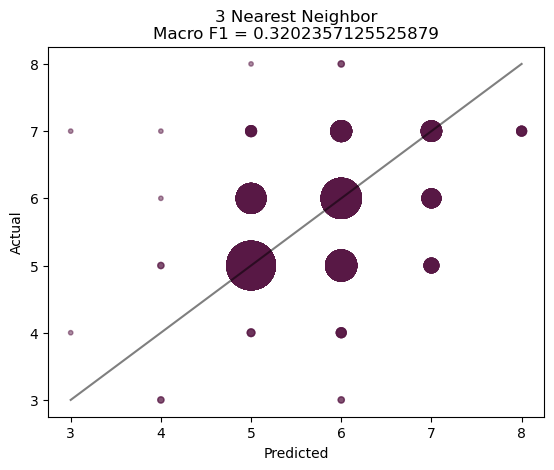

In [143]:

# try minmax scalers and removing outliers?
# MinMaxScaler(feature_range=(0, 1)).fit_transform(dfx[var_names])


#set limits for k
def k_lims():
    k_min = int(input("Input lowest K >= 1"))
    k_max = int(input("Input highest K")) + 1
    if k_min < 1 or k_max > df.shape[0]:
        return k_lims()
    else:
        return k_min,k_max

k_min, k_max = k_lims()


accuracy_scores = []
f1_scores = []
f1_macro = []
for i in range(k_min,k_max):
    
    # fit model with i nearest neighbors
    classification = neighbors.KNeighborsClassifier(i, weights = 'distance',p=11, n_jobs = -1)
    classification.fit( MinMaxScaler(feature_range=(0, 1)).fit_transform(x_train), y_train)

    # predict classification for test group
    knn_pred = classification.predict( MinMaxScaler(feature_range=(0, 1)).fit_transform(x_test))

    # calc accuracy score for prediction
    acc = accuracy_score(y_test, knn_pred)
    # append to list of acc scores
    accuracy_scores.append(acc)
    f1_scores.append(f1_score(y_test, knn_pred, average='weighted'))
    f1_macro.append(f1_score(y_test, knn_pred, average='macro'))


# plot it

def maxScore(scores, score_name:str):
    max_score = np.argmax(np.array(scores))
    if type(max_score) == np.ndarray:
        max_score = max_score[-1]
    
    classification = neighbors.KNeighborsClassifier(k_min + max_score, weights = 'distance',p=11, n_jobs = -1)
    classification.fit(x_train,y_train)
    knn_pred = classification.predict(x_test)
    
    print(classification_report(y_test, knn_pred, zero_division=0))
    graphResid(knn_pred, y_test, f"{k_min + max_score} Nearest Neighbor\n{score_name} = {scores[max_score]}")
    
    
max_acc_k = maxScore(accuracy_scores, "Accuracy")
max_f1_k = maxScore(f1_scores, "Weighted F1")
max_macro_k = maxScore(f1_macro, "Macro F1")

In [3]:
import os
(dirname, filename) = os.path.split(r'C:/Users/Morri/Documents/Notebooks/DSCI1302/Folds5x2_pp.csv')
print(dirname,filename)
os.path.basename(r'C:/Users/Morri/Documents/Notebooks/DSCI1302/Folds5x2_pp.csv').split('.')[0]

C:/Users/Morri/Documents/Notebooks/DSCI1302 Folds5x2_pp.csv


'Folds5x2_pp'

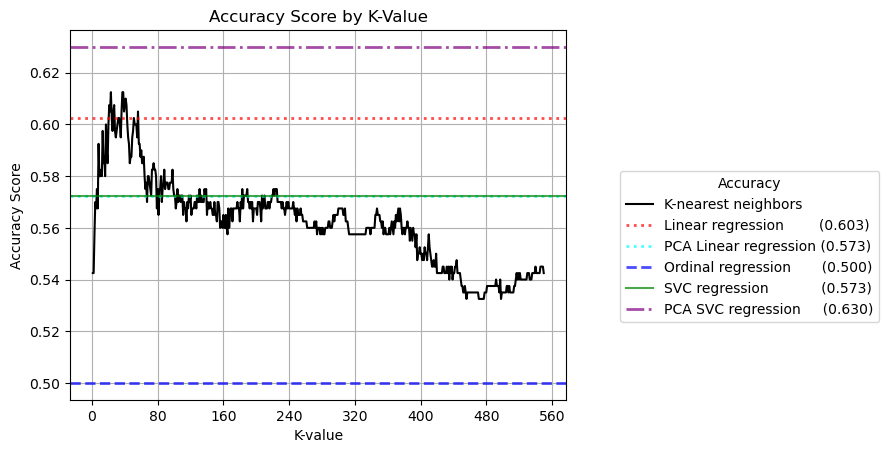

In [144]:
# plot accuracy scores by k value
acc_plot = plt.figure()
acc_ax = plt.axes()
k_range = list(range(k_min, k_max))
lw = 2
alpha = 0.7

# plot accuracy scores of other regressions
acc_ax.plot(k_range, accuracy_scores, c = 'black', label = 'K-nearest neighbors')
acc_ax.axhline(lr_acc, c = 'red', ls = ':', lw = lw, alpha = alpha, label = f'Linear regression        ({lr_acc:.3f})')
acc_ax.axhline(pca_lr_acc, c = 'cyan', ls = ':', lw = lw, alpha = alpha, label = f'PCA Linear regression ({pca_lr_acc:.3f})')
acc_ax.axhline(o_acc, c = 'blue', ls = '--', lw = lw, alpha = alpha, label = f'Ordinal regression       ({o_acc:.3f})')
acc_ax.axhline(svm_acc, c = 'green', alpha = alpha, label = f'SVC regression            ({svm_acc:.3f})')
acc_ax.axhline(pca_svm_acc, c = 'purple', lw = lw, alpha = alpha, ls = '-.', label = f'PCA SVC regression     ({pca_svm_acc:.3f})')


acc_ax.set_xlabel("K-value")
acc_ax.set_ylabel("Accuracy Score")
acc_ax.set_title("Accuracy Score by K-Value")
acc_plot.legend(title = 'Accuracy', frameon = True, fancybox = True, bbox_to_anchor=(1.4, 0.6))

acc_ax.grid()

acc_ax.xaxis.set_major_locator(MaxNLocator(integer=True))

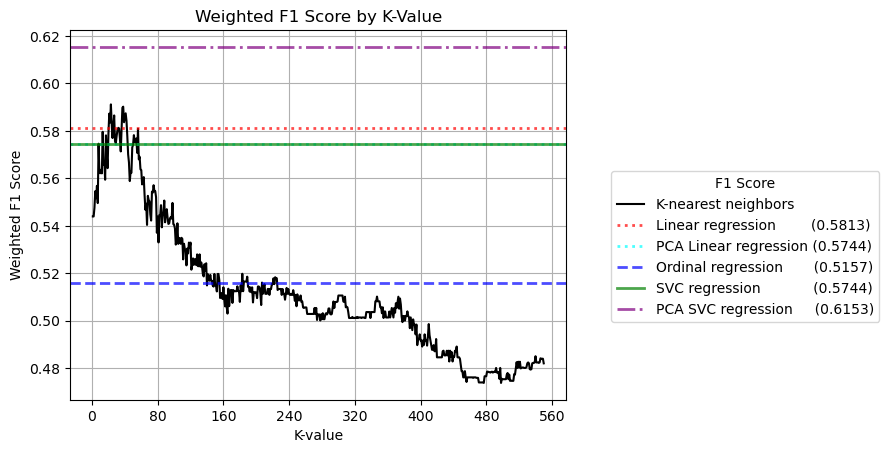

In [125]:
# plot f1 scores by k value
f1_plot = plt.figure()
f1_ax = plt.axes()
k_range = list(range(k_min, k_max))
lw = 2
alpha = 0.7

# plot f1uracy scores of other regressions
f1_ax.plot(k_range,f1_scores, c = 'black', label = 'K-nearest neighbors')
f1_ax.axhline(lr_f1,c = 'red', ls = ':', lw = lw, alpha = alpha, label = f'Linear regression        ({lr_f1:.4f})')
f1_ax.axhline(pca_lr_f1, c = 'cyan', ls = ':', lw = lw, alpha = alpha, label = f'PCA Linear regression ({pca_lr_f1:.4f})')
f1_ax.axhline(o_f1, c = 'blue', ls = '--', lw = lw, alpha = alpha, label = f'Ordinal regression       ({o_f1:.4f})')
f1_ax.axhline(svm_f1, c = 'green', lw = lw, alpha = alpha, label = f'SVC regression            ({svm_f1:.4f})')
f1_ax.axhline(pca_svm_f1, c = 'purple', ls = '-.', lw = lw, alpha = alpha, label = f'PCA SVC regression     ({pca_svm_f1:.4f})')

f1_ax.set_xlabel("K-value")
f1_ax.set_ylabel("Weighted F1 Score")
f1_ax.set_title("Weighted F1 Score by K-Value")
f1_plot.legend(title = 'F1 Score', frameon = True, fancybox = True, bbox_to_anchor=(1.4, 0.6))

f1_ax.grid()

f1_ax.xaxis.set_major_locator(MaxNLocator(integer=True))

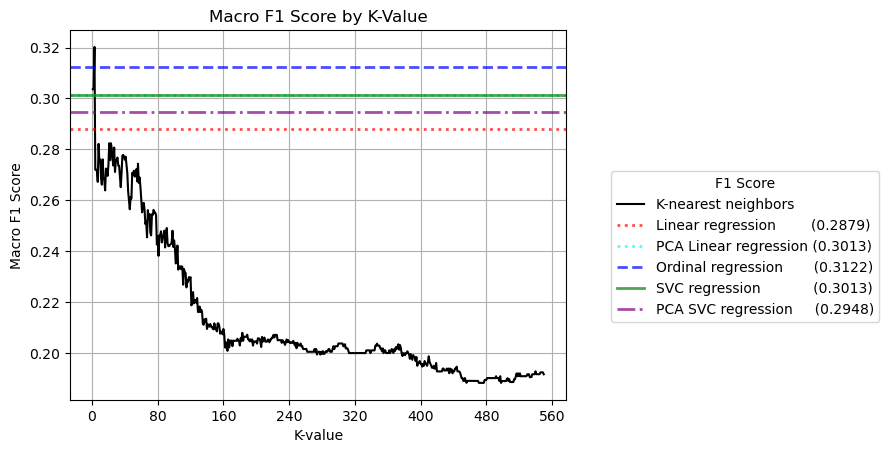

In [126]:
# plot macro f1 scores by k value
mf1_plot = plt.figure()
mf1_ax = plt.axes()
k_range = list(range(k_min, k_max))
lw = 2
alpha = 0.7

# plot f1uracy scores of other regressions
mf1_ax.plot(k_range, f1_macro, c = 'black', label = 'K-nearest neighbors')
mf1_ax.axhline(lr_mf1,c = 'red', ls = ':', lw = lw, alpha = alpha, label = f'Linear regression        ({lr_mf1:.4f})')
mf1_ax.axhline(pca_lr_mf1, c = 'cyan', ls = ':', lw = lw, alpha = alpha, label = f'PCA Linear regression ({pca_lr_mf1:.4f})')
mf1_ax.axhline(o_mf1, c = 'blue', ls = '--', lw = lw, alpha = alpha, label = f'Ordinal regression       ({o_mf1:.4f})')
mf1_ax.axhline(svm_mf1, c = 'green', lw = lw, alpha = alpha, label = f'SVC regression            ({svm_mf1:.4f})')
mf1_ax.axhline(pca_svm_mf1, c = 'purple', ls = '-.', lw = lw, alpha = alpha, label = f'PCA SVC regression     ({pca_svm_mf1:.4f})')

mf1_ax.set_xlabel("K-value")
mf1_ax.set_ylabel("Macro F1 Score")
mf1_ax.set_title("Macro F1 Score by K-Value")
mf1_plot.legend(title = 'F1 Score', frameon = True, fancybox = True, bbox_to_anchor=(1.4, 0.6))

mf1_ax.grid()

mf1_ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [127]:
print(seed)

35712
